# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Insights

### Analysis

* On the overall, most cities analysed are from the northern hemisphere. That is, 378 of the 548 random cities selected when the code  was last executed.
* The scatter plots of latitude vs. temperature shows a negative relationship between the latitude of the cities and their corresponding temperature. However, the scatter plots of latitude and humidity shows that there is a positive relationship between the latitude of the cities and their corresponding humidity values.
* The correlation figures for both northern and southern hemispheres mostly show weak correlations, except for Max Temp and Latitude in the northern hemisphere which has a strong correlation of 0.75. 

In [1]:
# Import all dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Print Cities List
print(cities)

['sakakah', 'fortuna', 'akyab', 'busselton', 'cherskiy', 'lagoa', 'ushuaia', 'khatanga', 'avera', 'inhambane', 'coihaique', 'severo-kurilsk', 'adrar', 'ngunguru', 'albany', 'dalaba', 'rikitea', 'punta arenas', 'lebu', 'bassar', 'hilo', 'los llanos de aridane', 'tiksi', 'bredasdorp', 'port augusta', 'dwarka', 'attawapiskat', 'samarai', 'saint-philippe', 'arraial do cabo', 'tsihombe', 'kodiak', 'kaitangata', 'yellowknife', 'iqaluit', 'rafsanjan', 'abu kamal', 'port alfred', 'amderma', 'taolanaro', 'gua musang', 'palabuhanratu', 'zaysan', 'araouane', 'avarua', 'siocon', 'norman wells', 'hobart', 'puerto ayora', 'qaanaaq', 'hermanus', 'hasaki', 'yuli', 'lompoc', 'oktyabrskoye', 'new norfolk', 'marcona', 'port blair', 'kalmunai', 'gallup', 'esperance', 'castro', 'nikolskoye', 'bethel', 'bundaberg', 'carnarvon', 'souillac', 'samusu', 'songadh', 'provideniya', 'innisfail', 'kapaa', 'balkanabat', 'atuona', 'tuktoyaktuk', 'padra', 'sorland', 'kontagora', 'mayo', 'zelenets', 'victoria', 'tasiila

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Components of API 
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Initializze a counter to store the city number
counter = 1

# Perform a weather check 
# on each of the cities using a series of successive API calls
# Then, extract the weather components (latitude, temperature, wind speed..)
# needed for our analyses and chats
for city in cities:
    try:
        query_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url).json()
        city_humidity = weather_response["main"]["humidity"]
        city_temp = weather_response["main"]["temp"]
        city_Maxtemp = weather_response["main"]["temp_max"]
        city_lat = weather_response["coord"]["lat"] 
        city_wind = weather_response["wind"]["speed"]
        city_cloud = weather_response["clouds"]["all"]
        city_country = weather_response["sys"]["country"]
        city_datetime = weather_response["dt"]
        city_lon = weather_response["coord"]["lon"]
        # Print a log of each city with the city number and city name
        print(f"processing record number {counter} | {city}")
        counter += 1
        city_data.append ({"City":city,
                           "Country": city_country,
                           "DateTime":city_datetime,
                           "Humidity": city_humidity,
                           "Temperature": city_temp,
                           "Max. Temp.":  city_Maxtemp,
                           "Latitude": city_lat,
                           "WindSpeed": city_wind,
                           "Cloudiness": city_cloud,
                           "Longitude": city_lon
                     })        
    except:
        # Print city does not exist, if the city details are missing
        print("City does not exist")
        pass

processing record number 1 | sakakah
processing record number 2 | fortuna
processing record number 3 | akyab
processing record number 4 | busselton
processing record number 5 | cherskiy
processing record number 6 | lagoa
processing record number 7 | ushuaia
processing record number 8 | khatanga
processing record number 9 | avera
processing record number 10 | inhambane
processing record number 11 | coihaique
processing record number 12 | severo-kurilsk
processing record number 13 | adrar
processing record number 14 | ngunguru
processing record number 15 | albany
processing record number 16 | dalaba
processing record number 17 | rikitea
processing record number 18 | punta arenas
processing record number 19 | lebu
processing record number 20 | bassar
processing record number 21 | hilo
processing record number 22 | los llanos de aridane
processing record number 23 | tiksi
processing record number 24 | bredasdorp
processing record number 25 | port augusta
processing record number 26 | dwark

processing record number 196 | alofi
processing record number 197 | grand-lahou
processing record number 198 | lucapa
processing record number 199 | manta
City does not exist
processing record number 200 | sao joao da barra
processing record number 201 | pevek
processing record number 202 | lichinga
processing record number 203 | marathon
processing record number 204 | atar
processing record number 205 | natchitoches
processing record number 206 | cap-aux-meules
processing record number 207 | abong mbang
processing record number 208 | sitka
processing record number 209 | narsaq
City does not exist
processing record number 210 | cockburn town
processing record number 211 | aksu
processing record number 212 | oron
processing record number 213 | tabou
processing record number 214 | nha trang
processing record number 215 | vaijapur
processing record number 216 | ippy
processing record number 217 | matara
processing record number 218 | montgomery
processing record number 219 | makakilo city

processing record number 395 | udachnyy
processing record number 396 | meulaboh
processing record number 397 | tuatapere
processing record number 398 | dabola
processing record number 399 | isangel
processing record number 400 | yar-sale
City does not exist
processing record number 401 | havre-saint-pierre
processing record number 402 | dingle
processing record number 403 | lewisville
City does not exist
processing record number 404 | colchester
processing record number 405 | batsfjord
processing record number 406 | razdolinsk
processing record number 407 | port lincoln
processing record number 408 | itoman
processing record number 409 | tandalti
processing record number 410 | riyadh
processing record number 411 | bartlesville
processing record number 412 | ilulissat
processing record number 413 | berlevag
processing record number 414 | chunskiy
processing record number 415 | adre
processing record number 416 | dungarpur
processing record number 417 | zhanakorgan
processing record numb

In [4]:
weather_response

{'coord': {'lon': 178.42, 'lat': 69.38},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -6.12,
  'feels_like': -13.22,
  'temp_min': -6.12,
  'temp_max': -6.12,
  'pressure': 1003,
  'humidity': 96,
  'sea_level': 1003,
  'grnd_level': 1002},
 'visibility': 391,
 'wind': {'speed': 6.18, 'deg': 284},
 'snow': {'1h': 0.14},
 'clouds': {'all': 100},
 'dt': 1604770043,
 'sys': {'country': 'RU', 'sunrise': 1604783007, 'sunset': 1604803002},
 'timezone': 43200,
 'id': 2123814,
 'name': 'Leningradskiy',
 'cod': 200}

In [5]:
# Convert city_data to DataFrame
city_data = pd.DataFrame(city_data)
city_data

# Export the city data into a .csv 
city_data.to_csv(output_data_file, encoding="utf-8", index=False)
city_data

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,sakakah,SA,1604769926,37,21.00,21.00,29.97,4.10,0,40.21
1,fortuna,US,1604769834,87,9.85,10.56,40.60,5.70,1,-124.16
2,akyab,MM,1604769926,78,25.68,25.68,20.15,2.99,0,92.90
3,busselton,AU,1604769927,66,12.49,13.33,-33.65,1.68,11,115.33
4,cherskiy,RU,1604769927,95,-14.40,-14.40,68.75,2.92,95,161.30
...,...,...,...,...,...,...,...,...,...,...
528,achit,RU,1604770043,97,1.70,1.70,56.80,1.59,100,57.90
529,tuburan,PH,1604770043,76,26.01,26.01,6.64,0.55,100,122.27
530,vancouver,CA,1604769900,86,4.82,5.56,49.25,2.60,75,-123.12
531,fairbanks,US,1604769758,86,-3.12,-2.00,64.84,1.50,90,-147.72


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(city_data)

533

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check the city_data for cities with humidity <= 100
clean_city_data = city_data.loc[(
    city_data["Humidity"] <= 100)]
clean_city_data

# The cities with humidity below or equal to 100 
# are still the same cities in our original datasets

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,sakakah,SA,1604769926,37,21.00,21.00,29.97,4.10,0,40.21
1,fortuna,US,1604769834,87,9.85,10.56,40.60,5.70,1,-124.16
2,akyab,MM,1604769926,78,25.68,25.68,20.15,2.99,0,92.90
3,busselton,AU,1604769927,66,12.49,13.33,-33.65,1.68,11,115.33
4,cherskiy,RU,1604769927,95,-14.40,-14.40,68.75,2.92,95,161.30
...,...,...,...,...,...,...,...,...,...,...
528,achit,RU,1604770043,97,1.70,1.70,56.80,1.59,100,57.90
529,tuburan,PH,1604770043,76,26.01,26.01,6.64,0.55,100,122.27
530,vancouver,CA,1604769900,86,4.82,5.56,49.25,2.60,75,-123.12
531,fairbanks,US,1604769758,86,-3.12,-2.00,64.84,1.50,90,-147.72


In [8]:
#  Get the indices of cities that have humidity over 100%.
reduced_city_data = city_data.loc[(
    city_data["Humidity"] > 100)]
reduced_city_data.index

# There is no city with humidity>100.
# So, this step and the next step are skipped

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

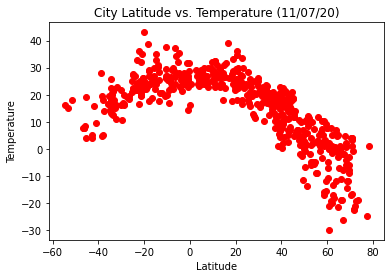

In [10]:
# Retrieve the latitude and temperature from city_data
latitude = city_data["Latitude"].tolist()
latitude
temperature = city_data["Temperature"].tolist()
temperature


# Plot the scatter diagram of latitude vs. temperature
plt.scatter(latitude, temperature, color = "red")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure1.png")    
 
   

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.temperature in order to show how much a cit's temperature is affected by its latitude.

## Latitude vs. Humidity Plot

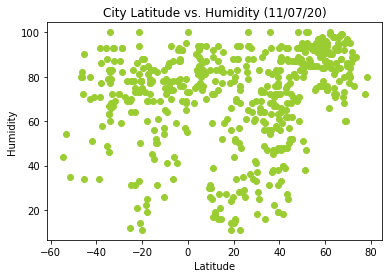

In [11]:
# Retrieve the humidity from city_data
humidity = city_data["Humidity"].tolist()
humidity

# Plot the scatter diagram of latitude vs. humidity
plt.scatter(latitude, humidity, color="yellowgreen")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure2.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.humidity in order to show how much a city's humidity is affected by its latitude.

## Latitude vs. Cloudiness Plot

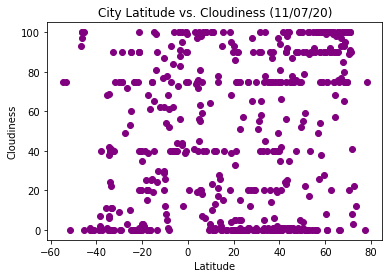

In [12]:
# Retrieve the cloudiness from city_data
cloudiness = city_data["Cloudiness"].tolist()
cloudiness

# Plot the scatter diagram of latitude vs. cloudiness
plt.scatter(latitude, cloudiness, color="purple")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure3.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.ccloudiness in order to show how much a city's cloudiness is affected by its latitude.

## Latitude vs. Wind Speed Plot

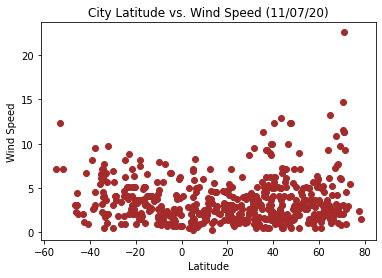

In [13]:
# Retrieve the wind speed from city_data
windspeed = city_data["WindSpeed"].tolist()
windspeed

# Plot the scatter diagram of latitude vs. wind speed
plt.scatter(latitude, windspeed, color="brown")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure4.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.wind speed in order to show how much a city's wind speed is affected by its latitude.

## Linear Regression

In [14]:
w# Select data for Northern Hemisphere
North_city_data = city_data.loc[(
    city_data["Latitude"] >= 0)]
print(len(North_city_data))
North_city_data.head()

370


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,sakakah,SA,1604769926,37,21.00,21.00,29.97,4.10,0,40.21
1,fortuna,US,1604769834,87,9.85,10.56,40.60,5.70,1,-124.16
2,akyab,MM,1604769926,78,25.68,25.68,20.15,2.99,0,92.90
4,cherskiy,RU,1604769927,95,-14.40,-14.40,68.75,2.92,95,161.30
5,lagoa,PT,1604769927,72,16.30,16.30,39.05,8.68,2,-27.98


In [15]:
# Select data for Southern Hemisphere
South_city_data = city_data.loc[(
    city_data["Latitude"] < 0)]
print(len(South_city_data))
South_city_data.head()

163


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
3,busselton,AU,1604769927,66,12.49,13.33,-33.65,1.68,11,115.33
6,ushuaia,AR,1604769786,44,16.00,16.00,-54.80,7.20,75,-68.30
9,inhambane,MZ,1604769928,83,26.83,27.00,-23.86,5.10,0,35.38
10,coihaique,CL,1604769928,34,19.00,19.00,-45.58,3.10,0,-72.07
13,ngunguru,NZ,1604769929,93,16.67,16.67,-35.62,5.40,11,174.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      28.338380
1      41.047913
2      22.641003
4      71.433922
5      34.060105
         ...    
528    51.833972
529    22.239265
530    47.134854
531    56.338309
532    61.353948
Name: Max. Temp., Length: 370, dtype: float64
y=-1.22x + 53.9
 Correlation = + 0.73


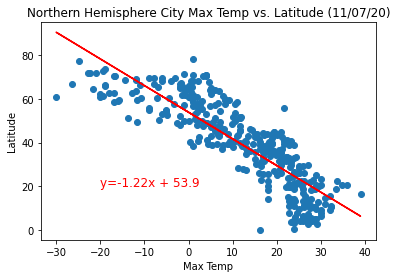

In [16]:
# Retrieve the Max Temp and Latitude for northern hemisphere
Northmax_temp = North_city_data.iloc[:,5]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
N_slope, N_int, N_r, N_p, N_std_err = linregress(Northmax_temp, North_lat)
N_fit = N_slope * Northmax_temp + N_int
print(N_fit)

# Print the regression equation
North_equation =  f"y={round(N_slope, 2)}x + {round(N_int,2)}"
print(North_equation)

# Compute and print the correlation 
N_correlation = round(N_r**2 , 2)
print(f" Correlation = + {N_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
plt.plot(Northmax_temp, N_fit, color="red")
plt.annotate(North_equation,(-20,20), fontsize=12, color ="red")
plt.scatter(Northmax_temp, North_lat)

# Include the axes labels, plot title and date of analysis
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Northern Hemisphere City Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure5.png")
plt.show() 
 
# After each pair of plots, explain what the linear regression is modeling
# such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

3     -32.281538
6     -29.026661
9     -15.617055
10    -25.369496
13    -28.209894
         ...    
513   -20.493276
515   -15.617055
517   -13.178945
522   -20.761468
527   -24.833112
Name: Max. Temp., Length: 163, dtype: float64
y=1.22x + (-48.53)
 Correlation = + 0.42


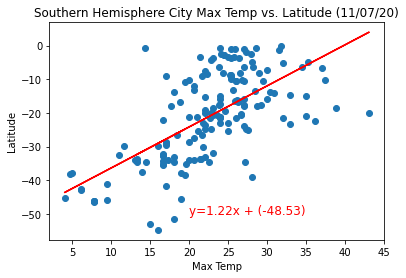

In [17]:
# Retrieve the Max Temp and latitude for southern hemisphere
Southmax_temp = South_city_data.iloc[:,5]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
S_slope, S_int, S_r, S_p, S_std_err = linregress(Southmax_temp, South_lat)
S_fit = S_slope * Southmax_temp + S_int
print(S_fit)

# Print the regression equation
South_equation =  f"y={round(S_slope, 2)}x + ({round(S_int,2)})"
print(South_equation)

# Compute and print the correlation 
S_correlation = round(S_r**2 , 2)
print(f" Correlation = + {S_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(Southmax_temp, S_fit, color="red")
plt.annotate(South_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(Southmax_temp, South_lat)
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Southern Hemisphere City Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      28.545554
1      43.985467
2      41.206282
4      46.455853
5      39.353493
         ...    
528    47.073449
529    40.588686
530    43.676668
531    43.676668
532    46.764651
Name: Humidity, Length: 370, dtype: float64
y=0.31x + 17.12
 Correlation = + 0.12


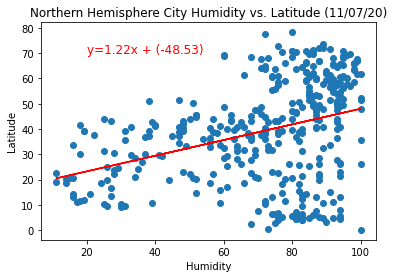

In [18]:
# Retrieve the humidity for northern hemisphere
North_city_data.head()
North_humidity = North_city_data.iloc[:,3]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
NHL_slope, NHL_int, NHL_r, NHL_p, NHL_std_err = linregress(North_humidity, North_lat)
NHL_fit = NHL_slope * North_humidity + NHL_int
print(NHL_fit)

# Print the regression equation
NorthHL_equation =  f"y={round(NHL_slope, 2)}x + {round(NHL_int,2)}"
print(NorthHL_equation)

# Compute and print the correlation 
NHL_correlation = round(NHL_r**2 , 2)
print(f" Correlation = + {NHL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_humidity, NHL_fit, color="red")
plt.annotate(South_equation,(20,70), fontsize=12, color ="red")
plt.scatter(North_humidity, North_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere City Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

3     -21.043474
6     -21.713324
9     -20.525863
10    -22.017801
13    -20.221385
         ...    
513   -20.830340
515   -20.952131
517   -20.799892
522   -20.769444
527   -20.891235
Name: Humidity, Length: 163, dtype: float64
y=0.03x + (-23.05)
 Correlation = + 0.002


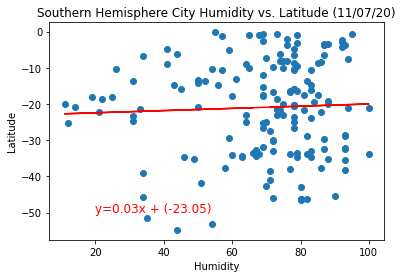

In [19]:
# Retrieve the humidity for northern hemisphere
South_city_data.head()
South_humidity = South_city_data.iloc[:,3]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
SHL_slope, SHL_int, SHL_r, SHL_p, SHL_std_err = linregress(South_humidity, South_lat)
SHL_fit = SHL_slope * South_humidity + SHL_int
print(SHL_fit)

# Print the regression equation
SouthHL_equation =  f"y={round(SHL_slope, 2)}x + ({round(SHL_int,2)})"
print(SouthHL_equation)

# Compute and print the correlation 
SHL_correlation = round(SHL_r**2 , 3)
print(f" Correlation = + {SHL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_humidity, SHL_fit, color="red")
plt.annotate(SouthHL_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(South_humidity, South_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      32.445445
1      32.580767
2      32.445445
4      45.300991
5      32.716088
         ...    
528    45.977598
529    45.977598
530    42.594560
531    44.624383
532    45.977598
Name: Cloudiness, Length: 370, dtype: float64
y=0.14x + 32.45
 Correlation = + 0.07


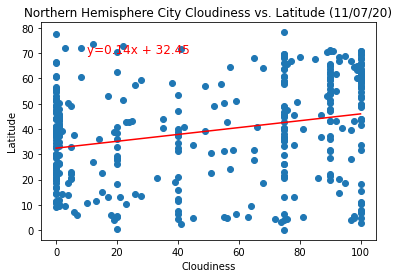

In [20]:
# Retrieve the cloudiness and Latitude for northern hemisphere
North_city_data.head()
North_cloud = North_city_data.iloc[:,8]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
NCL_slope, NCL_int, NCL_r, NCL_p, NCL_std_err = linregress(North_cloud, North_lat)
NCL_fit = NCL_slope * North_cloud + NCL_int
print(NCL_fit)

# Print the regression equation
NorthCL_equation =  f"y={round(NCL_slope, 2)}x + {round(NCL_int,2)}"
print(NorthCL_equation)

# Compute and print the correlation 
NCL_correlation = round(NCL_r**2 , 2)
print(f" Correlation = + {NCL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_cloud, NCL_fit, color="red")
plt.annotate(NorthCL_equation,(10,70), fontsize=12, color ="red")
plt.scatter(North_cloud, North_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere City Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

3     -23.734858
6     -18.336029
9     -24.662782
10    -24.662782
13    -23.734858
         ...    
513   -21.288514
515   -22.975648
517   -21.288514
522   -24.409711
527   -24.494068
Name: Cloudiness, Length: 163, dtype: float64
y=0.08x + (-24.66)
 Correlation = + 0.07


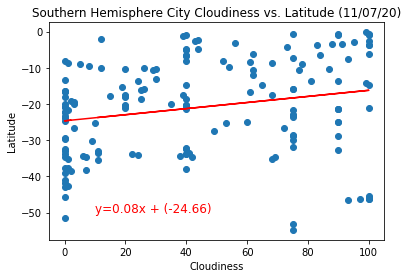

In [21]:
# Retrieve the cloudiness and Latitude for northern hemisphere
South_city_data.head()
South_cloud = South_city_data.iloc[:,8]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
SCL_slope, SCL_int, SCL_r, SCL_p, SCL_std_err = linregress(South_cloud, South_lat)
SCL_fit = SCL_slope * South_cloud + SCL_int
print(SCL_fit)

# Print the regression equation
SouthCL_equation =  f"y={round(SCL_slope, 2)}x + ({round(SCL_int,2)})"
print(SouthCL_equation)

# Compute and print the correlation
SCL_correlation = round(SCL_r**2 , 2)
print(f" Correlation = + {NCL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.annotate(SouthCL_equation,(10,-50), fontsize=12, color ="red")
plt.plot(South_cloud, SCL_fit, color="red")
plt.scatter(South_cloud, South_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      39.872132
1      42.043196
2      38.365956
4      38.270972
5      46.086804
         ...    
528    36.466275
529    35.055083
530    37.836759
531    36.344152
532    42.694516
Name: WindSpeed, Length: 370, dtype: float64
y=1.36x + 34.31
 Correlation = + 0.04


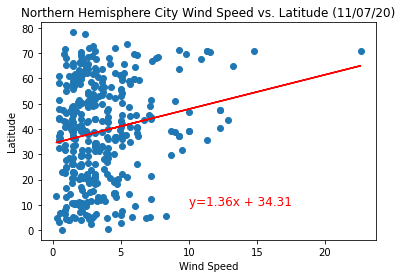

In [22]:
# Retrieve the wind speed and Latitude for northern hemisphere
North_city_data.head()
North_windspeed = North_city_data.iloc[:,7]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
NWL_slope, NWL_int, NWL_r, NWL_p, NWL_std_err = linregress(North_windspeed, North_lat)
NWL_fit = NWL_slope * North_windspeed + NWL_int
print(NWL_fit)

# Print the regression equation
NorthWL_equation =  f"y={round(NWL_slope, 2)}x + {round(NWL_int,2)}"
print(NorthWL_equation)

# Compute and print the correlation 
NWL_correlation = round(NWL_r**2 , 2)
print(f" Correlation = + {NWL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_windspeed, NWL_fit, color="red")
plt.annotate(NorthWL_equation,(10,10), fontsize=12, color ="red")
plt.scatter(North_windspeed, North_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere City Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

3     -17.386765
6     -27.040846
9     -23.368098
10    -19.870242
13    -23.892776
         ...    
513   -17.071958
515   -17.071958
517   -24.417455
522   -16.005112
527   -19.135692
Name: WindSpeed, Length: 163, dtype: float64
y=-1.75x + (-14.45)
 Correlation = + 0.09


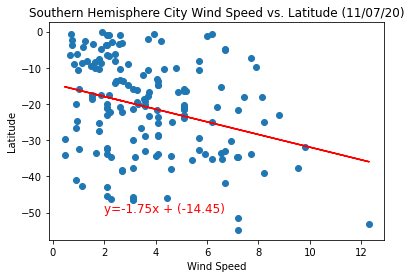

In [23]:
# Retrieve the wind speed and Latitude for southern hemisphere
South_city_data.head()
South_windspeed = South_city_data.iloc[:,7]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
SWL_slope, SWL_int, SWL_r, SWL_p, SWL_std_err = linregress(South_windspeed, South_lat)
SWL_fit = SWL_slope * South_windspeed + SWL_int
print(SWL_fit)

# Print the regression equation
SouthWL_equation =  f"y={round(SWL_slope, 2)}x + ({round(SWL_int,2)})"
print(SouthWL_equation)

# Compute and print the correlation 
SWL_correlation = round(SWL_r**2 , 2)
print(f" Correlation = + {SWL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_windspeed, SWL_fit, color="red")
plt.annotate(SouthWL_equation,(2,-50), fontsize=12, color ="red")
plt.scatter(South_windspeed, South_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure12.png")
plt.show()